In [1]:
import numpy as np
import numba as nb
import matplotlib
import matplotlib.pyplot as plt
import N2P_ratio_not_eq_nonumba as N2P

a_std = np.load("Luke-a.npy") #scale factor in standard cosmology
T_std = np.load("Luke-T.npy") #termperature in standard cosmology

In [2]:
a_vals_short = np.load("300-8e-05/full-all-a_array.npy")
T_vals_short = np.load("300-8e-05/full-all-T_array.npy")

#y lengths for 300-8e-05-FullTestNew are 42, 13, 10, 11, 10, 11, 15, 101, 69, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2
ylist_short = [np.transpose(np.load("300-8e-05/full-0-y.npy"))] #42
length_short = 42
for i in range(1,20):
    yhold = np.transpose(np.load("300-8e-05/full-"+str(i)+"-y.npy"))
    length_short = length_short + len(yhold)
    ylist_short.append(yhold)

e_vals_short = np.zeros((length_short,595))
for i in range(length_short):
    for j in range(595):
        e_vals_short[i][j] = 0.5*j
y_vals_short = np.zeros((length_short,len(e_vals_short[0,:])+3)) #extra 3 for dQ/da, T and t
s = 0
for i in range(20):
    for j in range(len(ylist_short[i])):
        for k in range(len(ylist_short[i][j])-3): #this for loop doesn't account for dQ/da, T, and t
            y_vals_short[s+j][k] = ylist_short[i][j][k]
    s = s + len(ylist_short[i])
s = 0
for i in range(20):
    for j in range(len(ylist_short[i])): #this for loop only accounts for dQ/da, T, and t
            y_vals_short[s+j][-1] = ylist_short[i][j][-1] #time
            y_vals_short[s+j][-2] = ylist_short[i][j][-2] #temperature
            y_vals_short[s+j][-3] = ylist_short[i][j][-3] #dQda
    s = s + len(ylist_short[i])

In [3]:
#use all this to determine how big np.shape(y_vals) needs to be

y0 = np.transpose(np.load("300-1.35e-05/full-0-y.npy"))
y1 = np.transpose(np.load("300-1.35e-05/full-1-y.npy"))
y2 = np.transpose(np.load("300-1.35e-05/full-2-y.npy"))
y3 = np.transpose(np.load("300-1.35e-05/full-3-y.npy"))
y4 = np.transpose(np.load("300-1.35e-05/full-4-y.npy"))
y5 = np.transpose(np.load("300-1.35e-05/full-5-y.npy"))
y6 = np.transpose(np.load("300-1.35e-05/full-6-y.npy"))
y7 = np.transpose(np.load("300-1.35e-05/full-7-y.npy"))
y8 = np.transpose(np.load("300-1.35e-05/full-8-y.npy"))
y9 = np.transpose(np.load("300-1.35e-05/full-9-y.npy"))
y10 = np.transpose(np.load("300-1.35e-05/full-10-y.npy"))
y11 = np.transpose(np.load("300-1.35e-05/full-11-y.npy"))
y12 = np.transpose(np.load("300-1.35e-05/full-12-y.npy"))
y13 = np.transpose(np.load("300-1.35e-05/full-13-y.npy"))
y14 = np.transpose(np.load("300-1.35e-05/full-14-y.npy"))
y15 = np.transpose(np.load("300-1.35e-05/full-15-y.npy"))
y16 = np.transpose(np.load("300-1.35e-05/full-16-y.npy"))
y17 = np.transpose(np.load("300-1.35e-05/full-17-y.npy"))
y18 = np.transpose(np.load("300-1.35e-05/full-18-y.npy"))
y19 = np.transpose(np.load("300-1.35e-05/full-19-y.npy"))
y20 = np.transpose(np.load("300-1.35e-05/full-20-y.npy"))
y21 = np.transpose(np.load("300-1.35e-05/full-21-y.npy"))
y22 = np.transpose(np.load("300-1.35e-05/full-22-y.npy"))
y23 = np.transpose(np.load("300-1.35e-05/full-23-y.npy"))
y24 = np.transpose(np.load("300-1.35e-05/full-24-y.npy"))
y25 = np.transpose(np.load("300-1.35e-05/full-25-y.npy"))
y26 = np.transpose(np.load("300-1.35e-05/full-26-y.npy"))
y27 = np.transpose(np.load("300-1.35e-05/full-27-y.npy"))
y28 = np.transpose(np.load("300-1.35e-05/full-28-y.npy"))
y29 = np.transpose(np.load("300-1.35e-05/full-29-y.npy"))

print(np.shape(y0))
print(np.shape(y1))
print(np.shape(y2))
print(np.shape(y3))
print(np.shape(y4))
print(np.shape(y5))
print(np.shape(y6))
print(np.shape(y7))
print(np.shape(y8))
print(np.shape(y9))
print(np.shape(y10))
print(np.shape(y11))
print(np.shape(y12))
print(np.shape(y13))
print(np.shape(y14))
print(np.shape(y15))
print(np.shape(y16))
print(np.shape(y17))
print(np.shape(y18))
print(np.shape(y19))
print(np.shape(y20))
print(np.shape(y21))
print(np.shape(y22))
print(np.shape(y23))
print(np.shape(y24))
print(np.shape(y25))
print(np.shape(y26))
print(np.shape(y27))
print(np.shape(y28))
print(np.shape(y29))

(42, 187)
(14, 187)
(7, 217)
(7, 248)
(7, 299)
(7, 348)
(7, 412)
(7, 487)
(8, 573)
(101, 359)
(52, 415)
(25, 487)
(13, 577)
(11, 363)
(7, 435)
(7, 527)
(8, 631)
(7, 395)
(9, 472)
(22, 560)
(29, 666)
(2, 678)
(2, 712)
(2, 675)
(2, 675)
(2, 675)
(2, 675)
(2, 675)
(2, 675)
(2, 675)


In [4]:
a_vals_long = np.load("300-1.35e-05/full-all-a_array.npy")
T_vals_long = np.load("300-1.35e-05/full-all-T_array.npy")

#y lengths for 300-1.35e-05-FullTestNew are 42, 14, 7, 7, 7, 7, 7, 7, 8, 101, 52, 25, 13, 11, 7, 7, 8, 7, 9, 22, 
#29, 2, 2, 2, 2, 2, 2, 2, 2, 2
ylist_long = [np.transpose(np.load("300-1.35e-05/full-0-y.npy"))] #42
elist_long = [np.load("300-1.35e-05/full-0-e.npy")]
length_long = 42
for i in range(1,30): #this for loop is just to create ylist and elist and calculate length_long
    yhold = np.transpose(np.load("300-1.35e-05/full-"+str(i)+"-y.npy")) #these are matrices
    ehold = np.load("300-1.35e-05/full-"+str(i)+"-e.npy") #these are just arrays
    length_long = length_long + len(yhold)
    ylist_long.append(yhold)
    elist_long.append(ehold)

e_vals_long = np.zeros((length_long,712))
y_vals_long = np.zeros((length_long,len(e_vals_long[0,:])+3)) #extra 3 for dQ/da, T and t
s = 0
for i in range(30):
    ehold = elist_long[i]
    for j in range(len(ylist_long[i])):
        for k in range(len(ylist_long[i][j])-3): #this for loop doesn't account for dQ/da, T, and t
            y_vals_long[s+j][k] = ylist_long[i][j][k]
            e_vals_long[s+j][k] = ehold[k]
    s = s + len(ylist_long[i])
s = 0
for i in range(30):
    for j in range(len(ylist_long[i])): #this for loop only accounts for dQ/da, T, and t
            y_vals_long[s+j][-1] = ylist_long[i][j][-1] #time
            y_vals_long[s+j][-2] = ylist_long[i][j][-2] #temperature
            y_vals_long[s+j][-3] = ylist_long[i][j][-3] #dQda
    s = s + len(ylist_long[i])

In [5]:
def pp(a_array,e_mat,T_array,y_mat,ms,mixangle): #post processing stuff
    y_final = y_mat[-1] #final distribution of neutrinos #np.transpose(y_mat)[-1] 
    time_arr = y_mat[:,-1]
    N_eff = N2P.N_eff(T_array[0],a_array[0],a_array[-1],y_final,e_mat[-1],e_mat[-1][1]-e_mat[-1][0]) #This won't work w/ varying boxsize...
    dilution_factor = N2P.F(T_array[0],T_array[-1],a_array[0],a_array[-1]) 
    spb_array = N2P.spb(a_array,T_array) #entropy per baryon ratio
    n2p, p2n, Hubble = N2P.driver(a_array, T_array, y_mat, e_mat, ms, mixangle) #returns array of n2p rate, p2n rate, 
                                                                                #and the Hubble rate over time
    std_cosmo_spb = np.zeros(len(T_array)) + 5.9*10**9 #entropy per baryon in standard cosmology
    t_array,Y_array = N2P.YnYp(n2p,p2n,T_array,time_arr)
    
    
    print("N effective is " + str(int(100*N_eff)/100))
    print("The dilution factor is " + str(int(100*dilution_factor)/100))
    
    
    plt.figure(figsize=(8,8))
    plt.loglog(T_array,n2p,label='$n\Rightarrow p$')
    plt.loglog(T_array,p2n,label='$p\Rightarrow n$')
    plt.loglog(T_array,Hubble, linestyle='--',label = 'Hubble rate')
    plt.xlabel('$T$ (MeV)',fontsize=16)
    plt.ylabel('Rate ($s^{-1}$)',fontsize=16)
    plt.xlim(10,10**-2)
    plt.ylim((10**-10,10**5))
    plt.legend(loc="upper right", fontsize=14)
    plt.tick_params(axis="x", labelsize=16)
    plt.tick_params(axis="y", labelsize=16)
    plt.show()
    
    
    plt.figure(figsize=(8,8))
    plt.loglog(1/a_array,T_array, linestyle="-", color='purple', label = "Our model")
    plt.loglog(1/a_std,T_std, linestyle="--", color='gold', label = "Std. Comsmology")
    plt.loglog(1/a_array,1/a_array, linestyle=':', color='grey')
    plt.xlabel("Tcm (MeV)",fontsize=16)
    plt.ylabel("T (MeV)",fontsize=16)
    plt.xlim(15,0.001)
    plt.ylim(0.001,15)
    plt.legend(loc="upper right", fontsize=14)
    plt.tick_params(axis="x", labelsize=16)
    plt.tick_params(axis="y", labelsize=16)
    plt.show()
    
    
    plt.figure(figsize=(8,8))
    plt.semilogx(T_array,spb_array*10**-9,color='purple',label="Our model")
    plt.semilogx(T_array,std_cosmo_spb*10**-9,color='gold',linestyle="--", label="Std. Cosmology")
    plt.xlabel("Plasma Temperature (MeV)",fontsize=16)
    plt.ylabel("Entropy-per-baryon ($\\times 10^9 {\\rm } k_{\\rm B}$)",fontsize=16)
    plt.xlim(15,0.01)
    plt.legend(loc="lower right", fontsize=14)
    plt.tick_params(axis="x", labelsize=16)
    plt.tick_params(axis="y", labelsize=16)
    plt.show()
    

    plt.figure(figsize=(8,6))
    plt.loglog(t_array,Y_array[0],label = '$Y_n$',color='darkturquoise')
    plt.loglog(t_array,Y_array[1],label = '$Y_p$',color='hotpink')
    plt.loglog(t_array,Y_array[2],label = '$Y_n$ + $Y_p$',color='blue')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Abundance',fontsize=18)
    plt.tick_params(axis="x", labelsize=14)
    plt.tick_params(axis="y", labelsize=14)
    plt.legend(loc="lower right", fontsize=14)
    plt.show()

In [6]:
def pp2(a_array,e_mat,T_array,y_mat,ms,mixangle): #post processing stuff
    y_final = y_mat[-1] #final distribution of neutrinos #np.transpose(y_mat)[-1] 
    time_arr = y_mat[:,-1]
    N_eff = N2P.N_eff(T_array[0],a_array[0],a_array[-1],y_final,e_mat[-1],e_mat[-1][1]-e_mat[-1][0]) #This won't work w/ varying boxsize...
    dilution_factor = N2P.F(T_array[0],T_array[-1],a_array[0],a_array[-1]) 
    spb_array = N2P.spb(a_array,T_array) #entropy per baryon ratio
    n2p, p2n, Hubble = N2P.driver(a_array, T_array, y_mat, e_mat, ms, mixangle) #returns array of n2p rate, p2n rate, 
                                                                                #and the Hubble rate over time
    std_cosmo_spb = np.zeros(len(T_array)) + 5.9*10**9 #entropy per baryon in standard cosmology
    t_array,Y_array = N2P.YnYp(n2p,p2n,T_array,time_arr)
    
    
    print("N effective is " + str(int(100*N_eff)/100))
    print("The dilution factor is " + str(int(100*dilution_factor)/100))
    return std_cosmo_spb, spb_array

/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:242: RuntimeWarning: invalid value encountered in double_scalars
  part2 = (Ev**2)*(Ev-dmnp)*((Ev-dmnp)**2 - me**2)**(1/2)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:335: RuntimeWarning: invalid value encountered in double_scalars
  part2 = (Ev**2)*(Ev-dmnp)*((Ev-dmnp)**2 - me**2)**(1/2)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:46: RuntimeWarning: overflow encountered in double_scalars
  return 1/(np.e**((Ee/T)-eta)+1)


N effective is 3.02
The dilution factor is 1.56


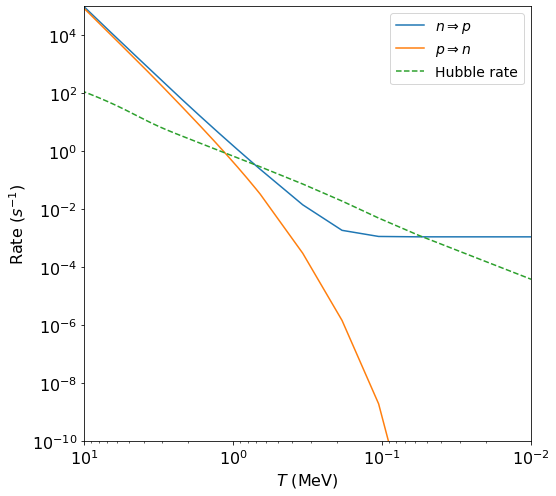

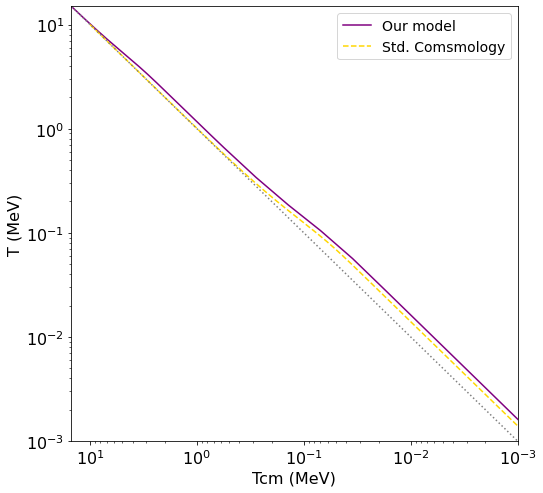

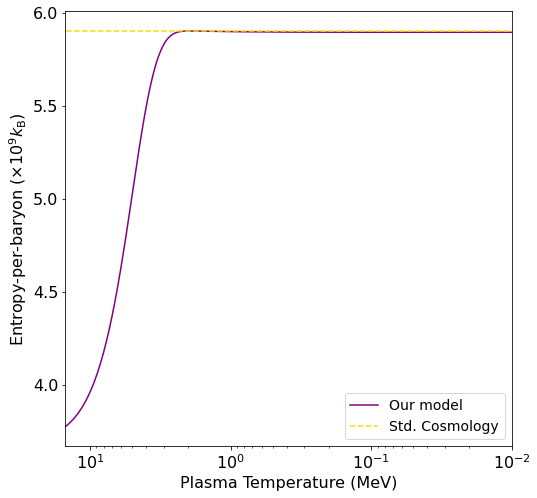

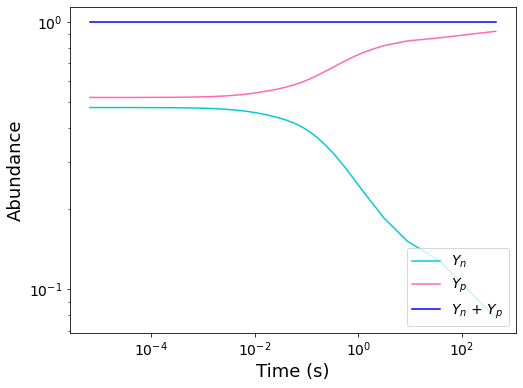

In [7]:
pp(a_vals_short,e_vals_short,T_vals_short,y_vals_short,300,0.00008)

/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:119: RuntimeWarning: overflow encountered in power
  denominator = np.e**((eps**2+x**2)**.5)+1
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:125: RuntimeWarning: overflow encountered in power
  denominator = ((eps**2+x**2)**.5)*(np.e**((eps**2+x**2)**.5)+1)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:242: RuntimeWarning: invalid value encountered in double_scalars
  part2 = (Ev**2)*(Ev-dmnp)*((Ev-dmnp)**2 - me**2)**(1/2)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:335: RuntimeWarning: invalid value encountered in double_scalars
  part2 = (Ev**2)*(Ev-dmnp)*((Ev-dmnp)**2 - me**2)**(1/2)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:46: RuntimeWarning: overflow encountered in double_scalars
  return 1/(np.e**((Ee/T)-eta)+1)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:464: Runtim

N effective is 2.91
The dilution factor is 4.14


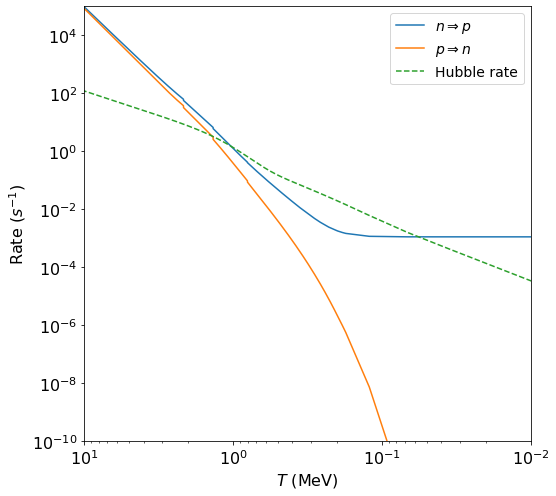

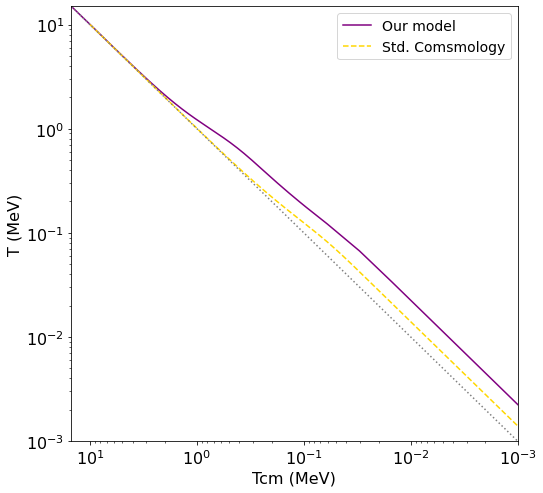

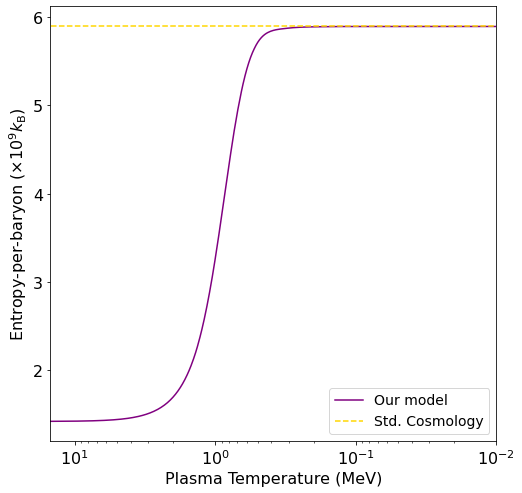

/Users/hannahrasmussen/opt/anaconda3/lib/python3.7/site-packages/numpy/ma/core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


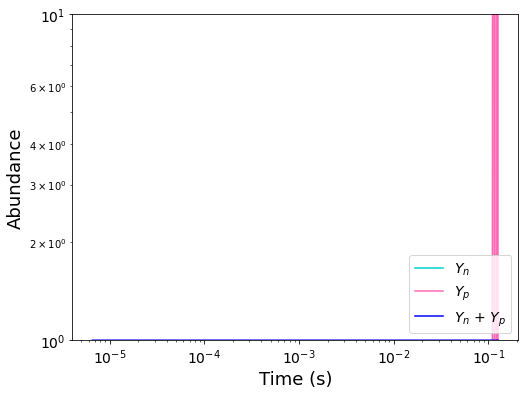

In [8]:
pp(a_vals_long,e_vals_long,T_vals_long,y_vals_long,300,0.0000135)

In [9]:
std_cosmo_spb_long, spb_array_long = pp2(a_vals_long,e_vals_long,T_vals_long,y_vals_long,300,0.0000135)

/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:119: RuntimeWarning: overflow encountered in power
  denominator = np.e**((eps**2+x**2)**.5)+1
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:125: RuntimeWarning: overflow encountered in power
  denominator = ((eps**2+x**2)**.5)*(np.e**((eps**2+x**2)**.5)+1)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:242: RuntimeWarning: invalid value encountered in double_scalars
  part2 = (Ev**2)*(Ev-dmnp)*((Ev-dmnp)**2 - me**2)**(1/2)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:335: RuntimeWarning: invalid value encountered in double_scalars
  part2 = (Ev**2)*(Ev-dmnp)*((Ev-dmnp)**2 - me**2)**(1/2)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:46: RuntimeWarning: overflow encountered in double_scalars
  return 1/(np.e**((Ee/T)-eta)+1)
/Users/hannahrasmussen/Work/Most recent code/N2P_ratio_not_eq_nonumba.py:464: Runtim

N effective is 2.91
The dilution factor is 4.14


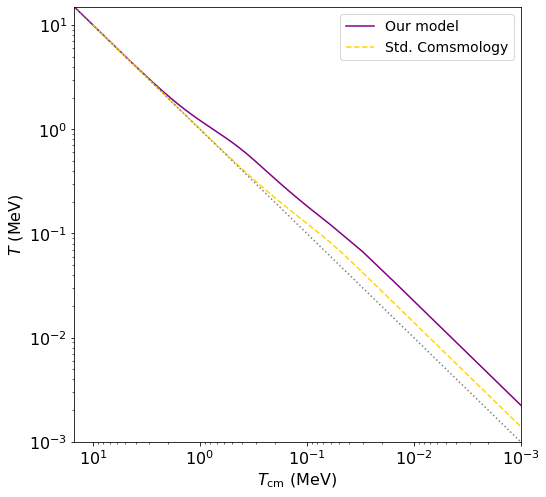

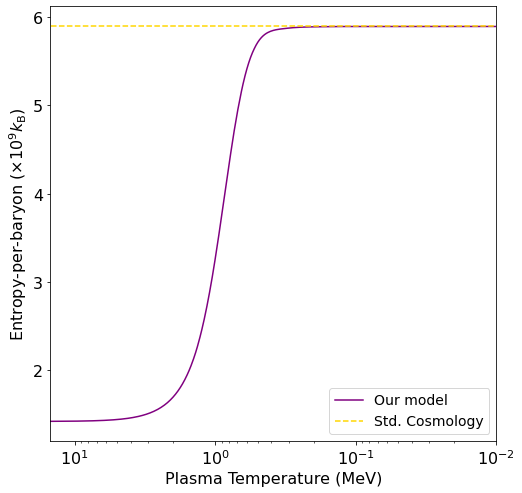

In [10]:
plt.figure(figsize=(8,8))
plt.loglog(1/a_vals_long,T_vals_long, linestyle="-", color='purple', label = "Our model")
plt.loglog(1/a_std,T_std, linestyle="--", color='gold', label = "Std. Comsmology")
plt.loglog(1/a_vals_long,1/a_vals_long, linestyle=':', color='grey')
plt.xlabel("$T_{\\rm cm}$ (MeV)",fontsize=16)
plt.ylabel("$T$ (MeV)",fontsize=16)
plt.xlim(15,0.001)
plt.ylim(0.001,15)
plt.legend(loc="upper right", fontsize=14)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.savefig("TTcmLong.pdf")   
    
plt.figure(figsize=(8,8))
plt.semilogx(T_vals_long,spb_array_long*10**-9,color='purple',label="Our model")
plt.semilogx(T_vals_long,std_cosmo_spb_long*10**-9,color='gold',linestyle="--", label="Std. Cosmology")
plt.xlabel("Plasma Temperature (MeV)",fontsize=16)
plt.ylabel("Entropy-per-baryon ($\\times 10^9 {\\rm } k_{\\rm B}$)",fontsize=16)
plt.xlim(15,0.01)
plt.legend(loc="lower right", fontsize=14)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.savefig("EntropyPerBaryonLong.pdf")

In [11]:
dilresults = np.load("300data.npz")
lifetime_array = dilresults['lifetime']
dil_array = dilresults['Dilution_Factor']
N_eff_array = dilresults['N_eff']

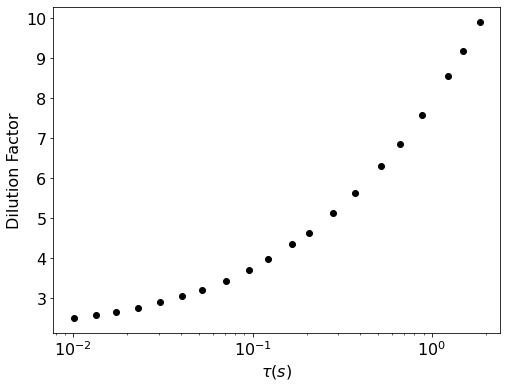

In [12]:
plt.figure(figsize=(8,6))
plt.semilogx(lifetime_array,dil_array,'o',color='k')
plt.xlabel("$\\tau(s)$",fontsize=16)
plt.ylabel("Dilution Factor",fontsize=16)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.savefig("dilution.pdf")

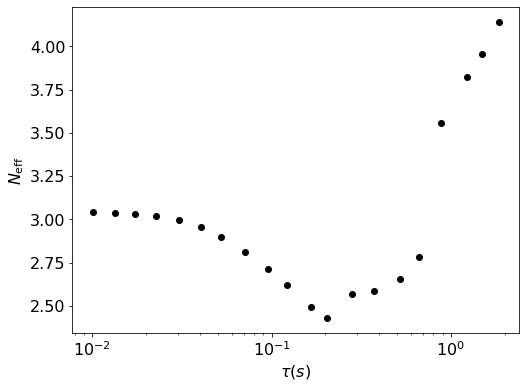

In [13]:
plt.figure(figsize=(8,6))
plt.semilogx(lifetime_array,N_eff_array,'o',color='k')
plt.xlabel("$\\tau(s)$",fontsize=16)
plt.ylabel("$N_{\\rm eff}$",fontsize=16)
plt.tick_params(axis="x", labelsize=16)
plt.tick_params(axis="y", labelsize=16)
plt.savefig("neff.pdf")